In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

dataset is from: https://www.kaggle.com/szamil/who-suicide-statistics

## Load and Explore

In [2]:
df = pd.read_csv("who_suicide_statistics.csv")

In [3]:
print(list(df.columns),'\n')

df.head(10)

['country', 'year', 'sex', 'age', 'suicides_no', 'population'] 



,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [4]:
df.groupby('country').country.count()

country
Albania                               372
Anguilla                              348
Antigua and Barbuda                   336
Argentina                             444
Armenia                               420
                                     ... 
Uruguay                               408
Uzbekistan                            360
Venezuela (Bolivarian Republic of)    384
Virgin Islands (USA)                  240
Zimbabwe                               12
Name: country, Length: 141, dtype: int64

In [5]:
country_group = df.groupby(["country"])

In [6]:
country_group['sex'].apply(lambda x:x.str.contains('female').sum())

country
Albania                               186
Anguilla                              174
Antigua and Barbuda                   168
Argentina                             222
Armenia                               210
                                     ... 
Uruguay                               204
Uzbekistan                            180
Venezuela (Bolivarian Republic of)    192
Virgin Islands (USA)                  120
Zimbabwe                                6
Name: sex, Length: 141, dtype: int64

In [7]:
snum =  df.groupby('year',axis = 0)
snum['suicides_no'].describe().tail()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2012,1284.0,182.309190,699.130107,0.0,1.0,13.0,85.00,11763.0
2013,1284.0,178.676791,692.839247,0.0,1.0,14.0,85.00,11396.0
2014,1200.0,189.827500,705.494907,0.0,1.0,14.0,92.00,11455.0
2015,924.0,225.008658,786.616615,0.0,1.0,20.0,115.50,11634.0
2016,264.0,62.435606,142.497481,0.0,0.0,6.0,65.25,1421.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [9]:
filt = df["country"] == "Turkey"
df.loc[filt].head()

,country,year,sex,age,suicides_no,population
40140,Turkey,2009,female,15-24 years,74.0,6097408.0
40141,Turkey,2009,female,25-34 years,44.0,6101898.0
40142,Turkey,2009,female,35-54 years,58.0,9027289.0
40143,Turkey,2009,female,5-14 years,18.0,6204481.0
40144,Turkey,2009,female,55-74 years,38.0,4301203.0


## Preprocess

In [10]:
data = country_group.get_group("Turkey")
data = data.sort_values(by=['year', 'sex','suicides_no'])

In [11]:
data.reset_index().to_feather("data.feather")
data = pd.read_feather("data.feather")
print(data.head())
type(data)

   index country  year     sex          age  suicides_no  population
0  40145  Turkey  2009  female    75+ years         17.0   1170072.0
1  40143  Turkey  2009  female   5-14 years         18.0   6204481.0
2  40144  Turkey  2009  female  55-74 years         38.0   4301203.0
3  40141  Turkey  2009  female  25-34 years         44.0   6101898.0
4  40142  Turkey  2009  female  35-54 years         58.0   9027289.0


pandas.core.frame.DataFrame

In [12]:
data.drop(['country','index'], axis = 1, inplace=True)

In [13]:
pd.set_option('display.max_rows',data.shape[0]+1)
data.head()

,year,sex,age,suicides_no,population
0,2009,female,75+ years,17.0,1170072.0
1,2009,female,5-14 years,18.0,6204481.0
2,2009,female,55-74 years,38.0,4301203.0
3,2009,female,25-34 years,44.0,6101898.0
4,2009,female,35-54 years,58.0,9027289.0


## Plotting

In [14]:
data.groupby(by=['age','sex'])['suicides_no'].sum().unstack().reset_index().melt(id_vars='age')

,age,sex,value
0,15-24 years,female,724.0
1,25-34 years,female,467.0
2,35-54 years,female,699.0
3,5-14 years,female,140.0
4,55-74 years,female,379.0
5,75+ years,female,160.0
6,15-24 years,male,1458.0
7,25-34 years,male,1613.0
8,35-54 years,male,2605.0
9,5-14 years,male,150.0


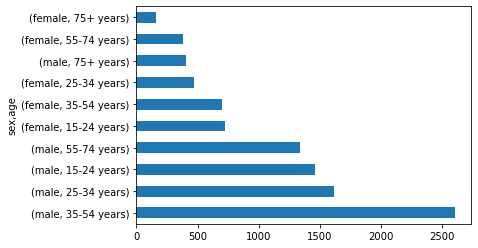

In [15]:
data.groupby(['sex','age']).suicides_no.sum().nlargest(10).plot(kind='barh')

In [16]:
age_coder = {'5-14 years':0,
            '15-24 years':1,
            '25-34 years':2,
            '35-54 years':3,
            '55-74 years':4,
            '75+ years':5}
gender_coder = {'female':0,'male':1}

data['age_encoder'] = data['age'].map(age_coder)
data['sex_encoder'] = data['sex'].map(gender_coder)


In [17]:
data1 = data.groupby('age_encoder')[['suicides_no']].sum()

Text(0.5, 1.0, 'Total Suicide based on age group for Turkey (2004-2015)')

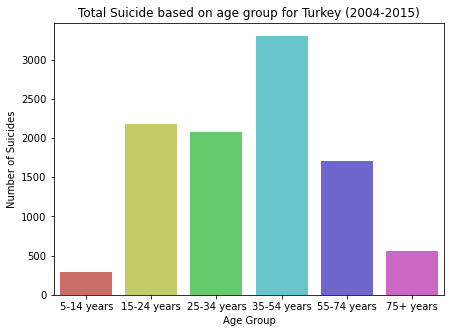

In [18]:
en = {0:'5-14 years',
      1:'15-24 years',
      2:'25-34 years',
      3:'35-54 years',
      4:'55-74 years',
      5:'75+ years'}

plt.figure(figsize=(7,5))
sns.barplot(x = data1.index.map(en.get), y = data1.suicides_no, palette='hls')
plt.xlabel("Age Group")
plt.ylabel("Number of Suicides")

plt.title("Total Suicide based on age group for Turkey (2004-2015)")